In [1]:
# Importer les bibliothèques
import warnings
import pandas as pd

# Ignorer les avertissements pour une meilleure lisibilité
warnings.simplefilter("ignore")

# Charger le jeu de données
data = pd.read_csv('./data/houseData.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [2]:
# Afficher un échantillon aléatoire de l'ensemble de données
data.sample(5)  # Affichage de 5 lignes aléatoires

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
37,7980000,9000,4,2,4,yes,no,no,no,yes,2,no,furnished
40,7875000,6550,3,1,2,yes,no,yes,no,yes,0,yes,furnished
33,8190000,5960,3,3,2,yes,yes,yes,no,no,1,no,unfurnished
26,8463000,6000,3,2,4,yes,yes,yes,no,yes,0,yes,semi-furnished
42,7700000,6480,3,2,4,yes,no,no,no,yes,2,no,unfurnished


In [3]:
# Supprimer les colonnes inutiles
columns_to_drop = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
data = data.drop(columns=columns_to_drop)

# Affichage des premières lignes pour vérifier
data.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


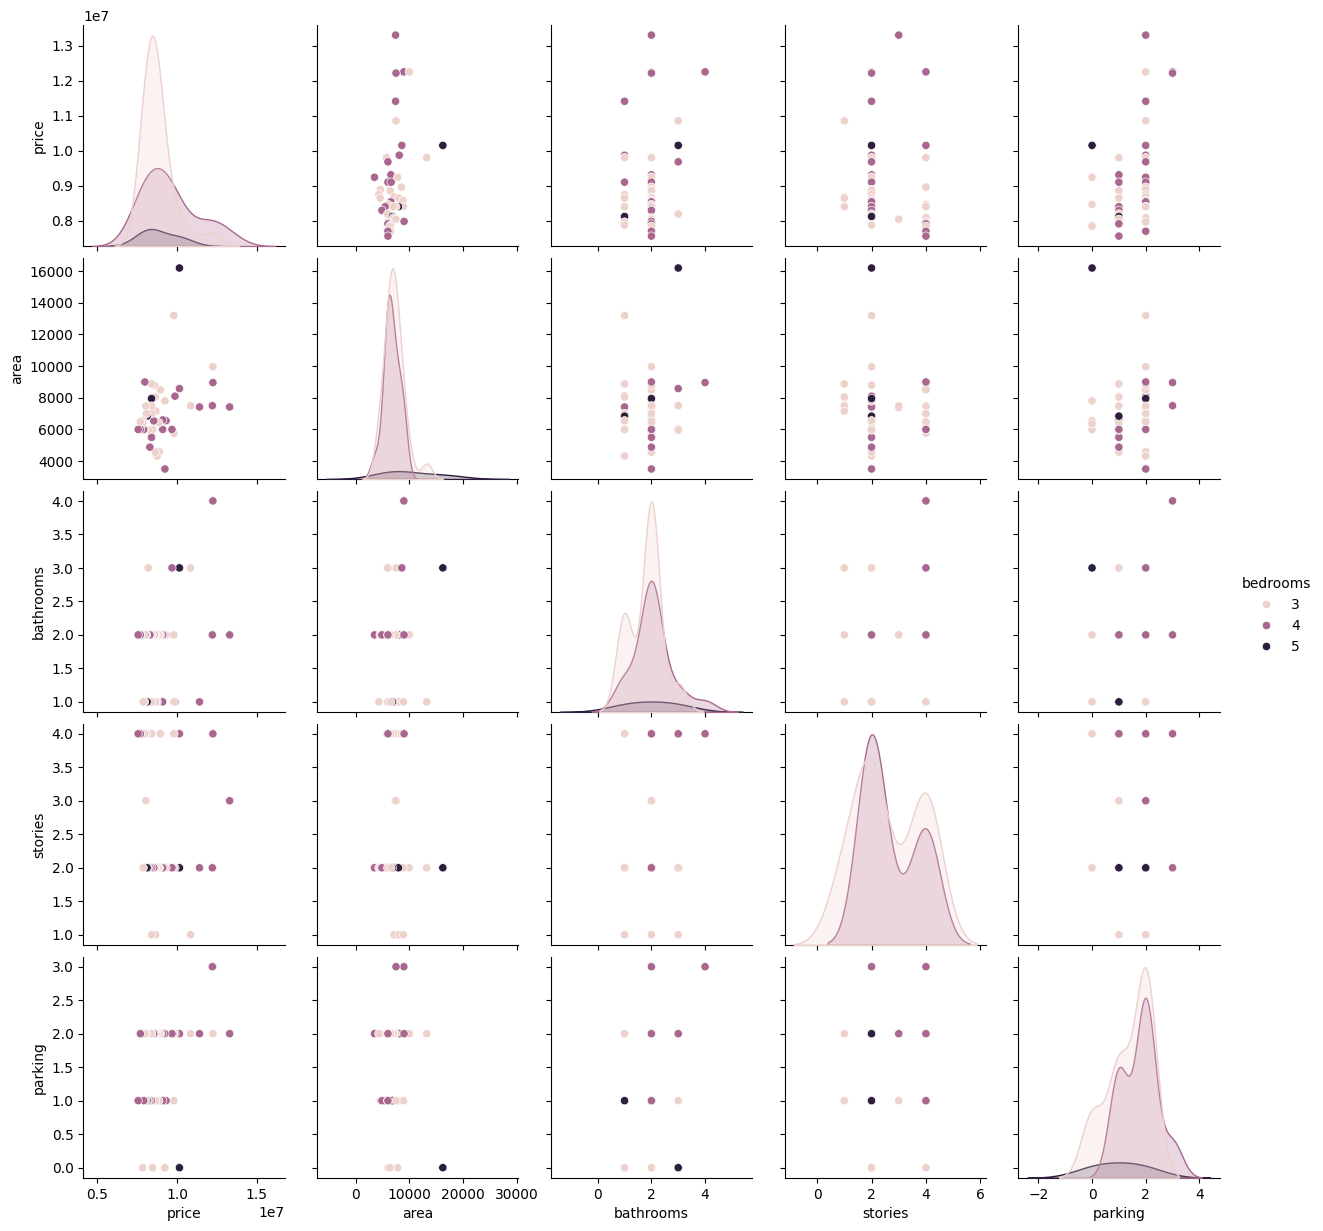

In [4]:
# Importer la bibliothèque seaborn
import seaborn as sns

# Tracer le pairplot en utilisant 'bedrooms' comme hue
sns.pairplot(data, hue='bedrooms')

# Afficher le graphique
import matplotlib.pyplot as plt
plt.show()

In [5]:
# Extraire les valeurs du prix (variable cible)
price = data['price']

# Afficher la taille de la variable cible (prix)
print("Taille du vecteur cible 'prix' :", price.shape)

Taille du vecteur cible 'prix' : (45,)


In [6]:
# Supprimer la colonne 'price' de l'ensemble de données
data = data.drop(columns=['price'])
data.head()

,area,bedrooms,bathrooms,stories,parking
0,7420,4,2,3,2
1,8960,4,4,4,3
2,9960,3,2,2,2
3,7500,4,2,2,3
4,7420,4,1,2,2


In [7]:
# Sélectionner les colonnes explicatives à utiliser pour prédire le prix
features = ['area', 'bedrooms', 'bathrooms', 'stories']

# Création d'un nouveau DataFrame avec ces colonnes
X = data[features]
X.head()

,area,bedrooms,bathrooms,stories
0,7420,4,2,3
1,8960,4,4,4
2,9960,3,2,2
3,7500,4,2,2
4,7420,4,1,2


In [8]:
# Imprimer les noms des colonnes du nouveau DataFrame X
print("Colonnes du DataFrame X :", X.columns)

Colonnes du DataFrame X : Index(['area', 'bedrooms', 'bathrooms', 'stories'], dtype='object')


In [9]:
from sklearn.linear_model import Lasso

# Création d'un modèle Lasso avec alpha = 0.2
lasso_model = Lasso(alpha=0.2)

# Entraînement du modèle avec les données (X : variables explicatives, Y : variable cible)
lasso_model.fit(X, price)
print("Coefficients du modèle Lasso :", lasso_model.coef_)

Coefficients du modèle Lasso : [ 1.69550253e+02  1.54483694e+05  5.71633514e+05 -2.79055960e+05]


L'effet du paramètre alpha sur le modèle :
- En augmentant la valeur de alpha, certains coefficients deviendront égaux à zéro. Cela indique que Lasso a "sélectionné" ces variables comme non significatives pour le modèle, ce qui peut être utile pour effectuer une sélection de variables.
- En réduisant alpha, les coefficients seront moins contraints, ce qui pourrait entraîner un modèle plus complexe avec plus de variables influençant la prédiction, et donc un risque de surajustement (overfitting).

In [10]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Charger les données

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, price, test_size=0.2, random_state=42)

# Création du modèle Lasso avec alpha = 0.2
lasso_model = Lasso(alpha=0.2)

# Ajustement du modèle
lasso_model.fit(X_train, y_train)

# Prédictions
y_pred = lasso_model.predict(X_test)

# Calculer l'erreur quadratique moyenne (MSE) et le R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Afficher les résultats
print("Coefficients du modèle Lasso : ", lasso_model.coef_)
print("Erreur quadratique moyenne (MSE) : %.2f" % mse)
print("R² (coefficient de détermination) : %.2f" % r2)

Coefficients du modèle Lasso :  [ 1.42109147e+02  4.24246543e+04  7.73543176e+05 -1.43326146e+05]
Erreur quadratique moyenne (MSE) : 1571021150310.56
R² (coefficient de détermination) : -0.19


In [11]:
# Imprimer les coefficients du modèle Lasso
print("Coefficients du modèle Lasso : ", lasso_model.coef_)

Coefficients du modèle Lasso :  [ 1.42109147e+02  4.24246543e+04  7.73543176e+05 -1.43326146e+05]


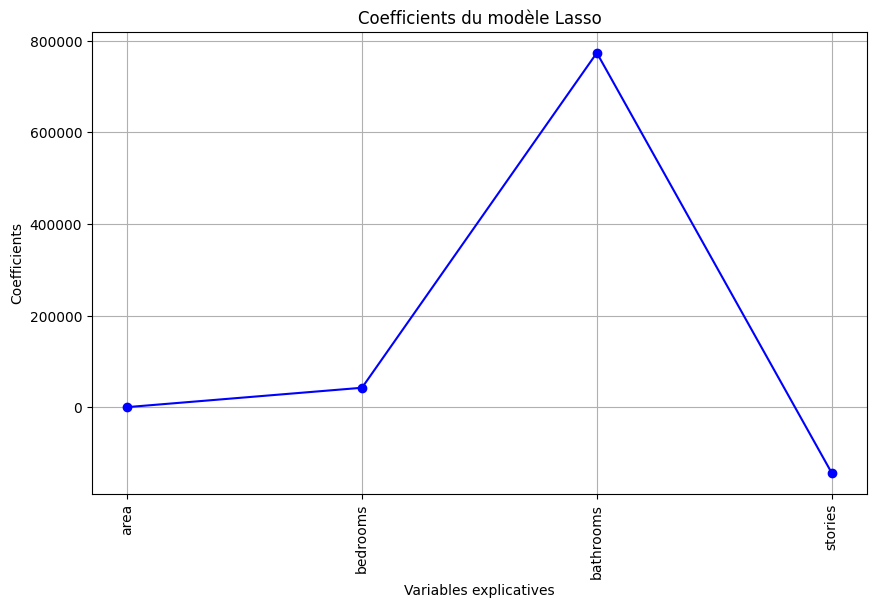

In [12]:
import matplotlib.pyplot as plt

# Tracer les coefficients du modèle Lasso sous forme de courbe
plt.figure(figsize=(10,6))
plt.plot(X.columns, lasso_model.coef_, marker='o', linestyle='-', color='b')
plt.xlabel("Variables explicatives")
plt.ylabel("Coefficients")
plt.title("Coefficients du modèle Lasso")
plt.xticks(rotation=90)  # Rotation des labels pour les rendre plus lisibles
plt.grid(True)
plt.show()

En analysant les coefficients de notre modèle Lasso, voici ce que l'on peut en déduire :

1) Réduction à zéro :

- Une caractéristique importante du modèle Lasso est qu'il a tendance à annuler les coefficients des variables qui ne sont pas significatives pour la prédiction. En d'autres termes, certaines variables vont avoir des coefficients proches de zéro ou même nuls, ce qui signifie qu'elles n'ont pas un grand impact sur la prédiction du prix des appartements.

2) Importance des variables :

- Les variables avec des coefficients plus élevés (en valeur absolue) sont celles qui influencent le plus le prix de l'appartement. En général, cela montre que ces variables sont plus pertinentes pour la prédiction. Par exemple, une variable avec un coefficient positif signifie qu'une augmentation de cette variable va entraîner une hausse du prix, tandis qu'un coefficient négatif indique qu'une augmentation de la variable réduira le prix.

3) Impact du paramètre alpha :

- Le paramètre alpha contrôle la force de la régularisation. Si alpha est élevé, la régularisation sera plus forte, et cela aura tendance à annuler plus de coefficients. Si alpha est plus faible, le modèle permet plus de flexibilité et ajuste plus librement les coefficients sans trop les contraindre. Dans notre cas, avec un alpha = 0.2, certains coefficients seront proches de zéro, mais d'autres resteront significatifs, ce qui montre l'effet modéré de la régularisation sur le modèle.
En résumé, en regardant ces coefficients, on peut identifier les variables les plus importantes pour prédire le prix des appartements et celles qui n'ont pas un grand impact. Cela permet de simplifier le modèle tout en conservant une bonne capacité de prédiction.

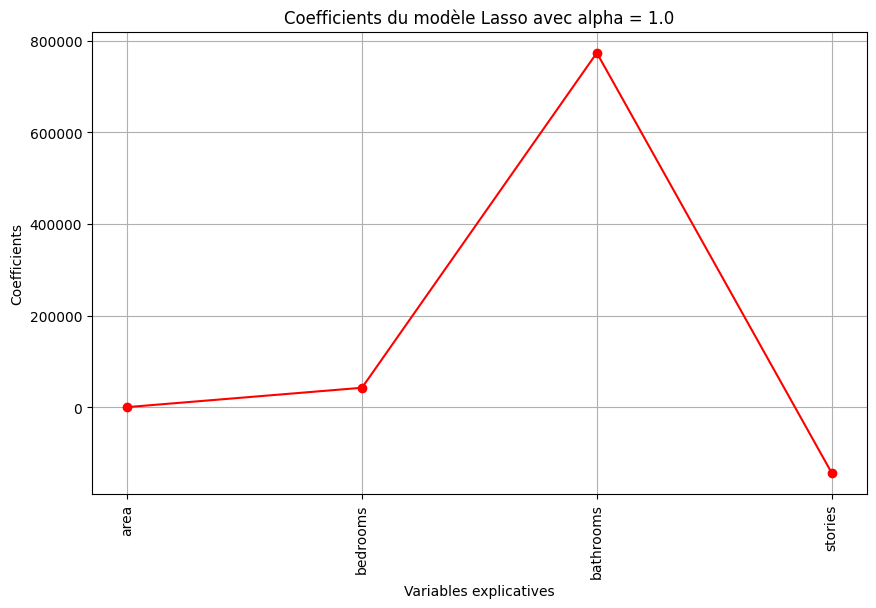

In [13]:
# Créer un modèle Lasso avec un alpha différent (par exemple alpha = 1)
lasso_model_alpha_1 = Lasso(alpha=1.0)
lasso_model_alpha_1.fit(X_train, y_train)

# Tracer les coefficients du modèle Lasso avec alpha = 1
plt.figure(figsize=(10,6))
plt.plot(X.columns, lasso_model_alpha_1.coef_, marker='o', linestyle='-', color='r')
plt.xlabel("Variables explicatives")
plt.ylabel("Coefficients")
plt.title("Coefficients du modèle Lasso avec alpha = 1.0")
plt.xticks(rotation=90)  # Rotation des labels pour les rendre plus lisibles
plt.grid(True)
plt.show()

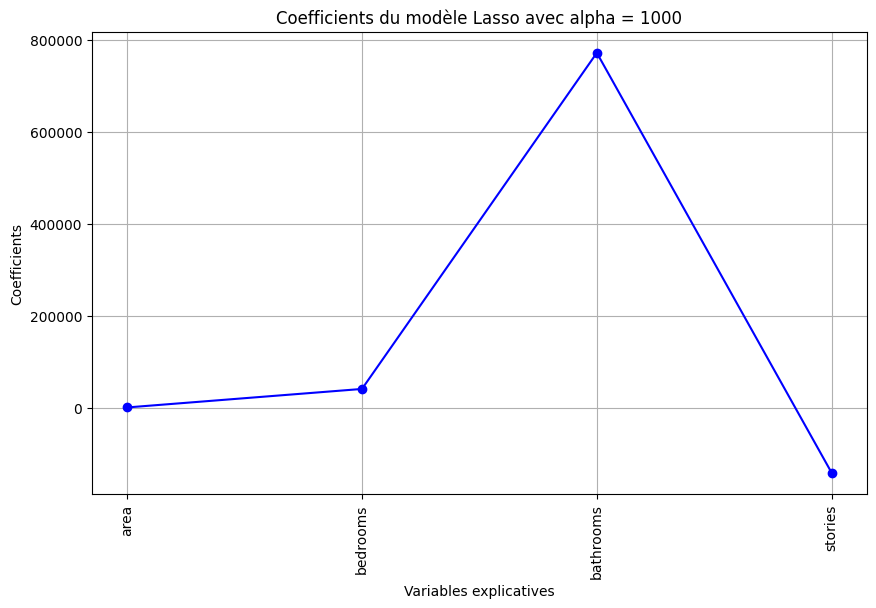

In [14]:
# Créer un modèle Lasso avec alpha = 1000
lasso_model_alpha_1000 = Lasso(alpha=1000)
lasso_model_alpha_1000.fit(X_train, y_train)

# Tracer les coefficients du modèle Lasso avec alpha = 1000
plt.figure(figsize=(10,6))
plt.plot(X.columns, lasso_model_alpha_1000.coef_, marker='o', linestyle='-', color='b')
plt.xlabel("Variables explicatives")
plt.ylabel("Coefficients")
plt.title("Coefficients du modèle Lasso avec alpha = 1000")
plt.xticks(rotation=90)  # Rotation des labels pour les rendre plus lisibles
plt.grid(True)
plt.show()

In [15]:
from sklearn.model_selection import cross_val_score

# Effectuer la validation croisée avec 5 plis (folds)
cv_scores = cross_val_score(lasso_model_alpha_1000, X_train, y_train, cv=5, scoring='r2')

# Afficher les scores pour chaque pli
print("Scores de chaque pli : ", cv_scores)

# Afficher le score moyen de la validation croisée
print("Score moyen de la validation croisée à 5 plis : ", cv_scores.mean())

Scores de chaque pli :  [ 0.02097131 -0.20628444  0.50066289  0.04532315 -4.83874373]
Score moyen de la validation croisée à 5 plis :  -0.895614163949497


In [16]:
import numpy as np

# Générer une plage de 50 valeurs de 10^-4 à 10^1
values = np.logspace(-4, 1, num=50)

# Afficher les valeurs générées
print(values)

[1.00000000e-04 1.26485522e-04 1.59985872e-04 2.02358965e-04
 2.55954792e-04 3.23745754e-04 4.09491506e-04 5.17947468e-04
 6.55128557e-04 8.28642773e-04 1.04811313e-03 1.32571137e-03
 1.67683294e-03 2.12095089e-03 2.68269580e-03 3.39322177e-03
 4.29193426e-03 5.42867544e-03 6.86648845e-03 8.68511374e-03
 1.09854114e-02 1.38949549e-02 1.75751062e-02 2.22299648e-02
 2.81176870e-02 3.55648031e-02 4.49843267e-02 5.68986603e-02
 7.19685673e-02 9.10298178e-02 1.15139540e-01 1.45634848e-01
 1.84206997e-01 2.32995181e-01 2.94705170e-01 3.72759372e-01
 4.71486636e-01 5.96362332e-01 7.54312006e-01 9.54095476e-01
 1.20679264e+00 1.52641797e+00 1.93069773e+00 2.44205309e+00
 3.08884360e+00 3.90693994e+00 4.94171336e+00 6.25055193e+00
 7.90604321e+00 1.00000000e+01]


Scores moyens de validation croisée :
[-1.06071007e-02 -1.06071793e-02 -1.06072881e-02 -1.06074407e-02
 -1.06076578e-02 -1.06079708e-02 -1.06084284e-02 -1.06091056e-02
 -1.06101197e-02 -1.06116545e-02 -1.06139992e-02 -1.06176101e-02
 -1.06232097e-02 -1.06319439e-02 -1.06456335e-02 -1.06671762e-02
 -1.07011874e-02 -1.07550264e-02 -1.08404348e-02 -1.09761576e-02
 -1.11921329e-02 -1.15361932e-02 -1.20847820e-02 -1.29600952e-02
 -1.43574986e-02 -1.65893849e-02 -2.01553294e-02 -2.58543184e-02
 -3.49642832e-02 -4.95293115e-02 -7.28191201e-02 -1.10064119e-01
 -1.69631372e-01 -2.64905915e-01 -4.17300552e-01 -6.61071013e-01
 -1.05101944e+00 -1.67481875e+00 -2.67272973e+00 -4.26914539e+00
 -6.82305727e+00 -1.09087940e+01 -1.74451913e+01 -2.79022452e+01
 -4.46317274e+01 -7.13961221e+01 -1.14216485e+02 -1.82719980e+02
 -2.92314793e+02 -4.67649198e+02]

Variances moyennes des scores :
[7.45806021e-06 7.45044674e-06 7.44083576e-06 7.42870963e-06
 7.41342045e-06 7.39415978e-06 7.36992272e-06 7.339466

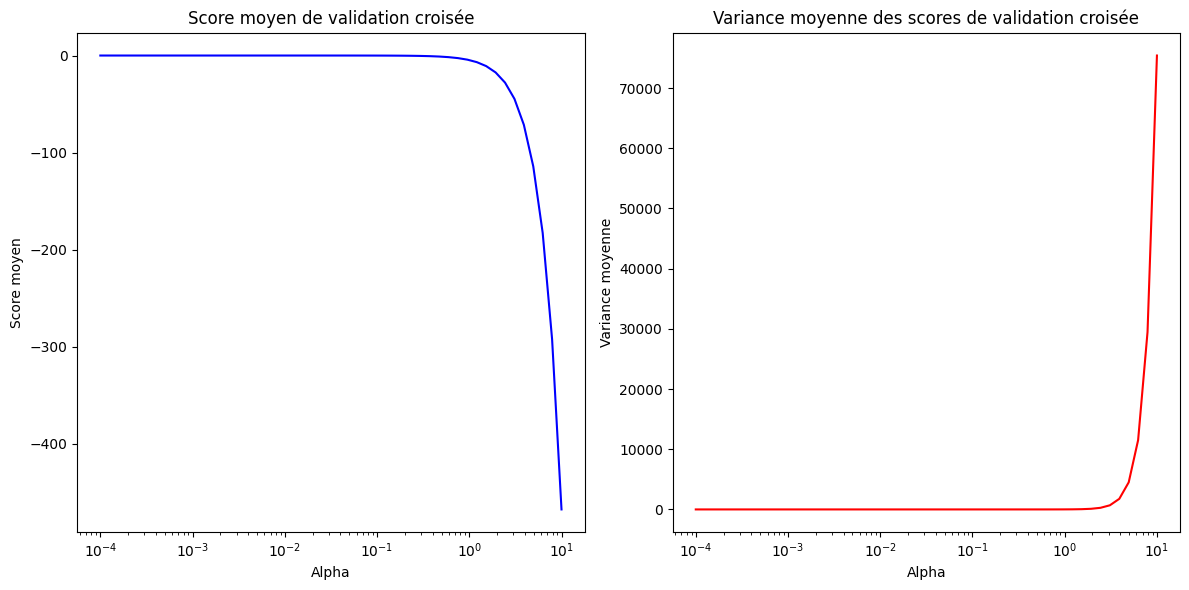

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Générer un jeu de données d'exemple (remplacer par vos données si vous en avez)
# Exemple avec un petit jeu de données simulé
X, y = make_regression(n_samples=100, n_features=3, noise=0.1, random_state=42)

# Créer deux tableaux pour stocker les résultats
mean_scores = []  # Tableau pour les scores moyens
mean_variances = []  # Tableau pour les variances moyennes

# Créer une plage de 50 valeurs de alpha (logarithmique) entre 10^-4 et 1
alphas = np.logspace(-4, 1, 50)

# Appliquer la validation croisée pour chaque valeur de alpha
for alpha in alphas:
    # Créer un modèle Lasso avec l'alpha actuel
    model = Lasso(alpha=alpha)
    
    # Effectuer une validation croisée (10 époques)
    scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')  # Utiliser l'erreur quadratique comme score
    
    # Calculer le score moyen et la variance des scores
    mean_score = np.mean(scores)
    mean_variance = np.var(scores)
    
    # Stocker les résultats dans les tableaux
    mean_scores.append(mean_score)
    mean_variances.append(mean_variance)

# Convertir les résultats en tableaux NumPy pour un traitement plus facile
mean_scores = np.array(mean_scores)
mean_variances = np.array(mean_variances)

# Afficher les résultats
print("Scores moyens de validation croisée :")
print(mean_scores)

print("\nVariances moyennes des scores :")
print(mean_variances)

# Optionnel : visualiser les résultats
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Tracer le score moyen
plt.subplot(1, 2, 1)
plt.plot(alphas, mean_scores, label="Score moyen", color='blue')
plt.xscale('log')  # Utiliser une échelle logarithmique pour alpha
plt.xlabel('Alpha')
plt.ylabel('Score moyen')
plt.title('Score moyen de validation croisée')

# Tracer la variance moyenne
plt.subplot(1, 2, 2)
plt.plot(alphas, mean_variances, label="Variance moyenne", color='red')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Variance moyenne')
plt.title('Variance moyenne des scores de validation croisée')

plt.tight_layout()
plt.show()